In [6]:
import numpy as np
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df, df_test = train_test_split(df)

X = df.iloc[:, 0:13]
X_test = df_test.iloc[:, 0:13]

Y = df['MEDV'] #TARGET：平均価格
Y_test = df_test['MEDV']

TIPS 0
問：カテゴリ変数を無理やり作るために，CHAS(クラス2つ)とRAD(クラス9つ)を置き換えよ．

In [13]:
# loc, ilocでブールインデックス参照
X["CHAS"].loc[X["CHAS"] == 0] = "apple"
X["CHAS"].loc[X["CHAS"] == 1] = "banana"

X_test["CHAS"].loc[X_test["CHAS"] == 0] = "apple"
X_test["CHAS"].loc[X_test["CHAS"] == 1] = "banana"

for i in X["RAD"].unique():
    X["RAD"].loc[X["RAD"] == i] = "koreha-{}".format(i)
    X_test["RAD"].loc[X_test["RAD"] == i] = "koreha-{}".format(i)
    
# 他にもmaskやwhere関数があるが，今はここで止めとく

TIPS 1
- 問：カラムのタイプを数えよう
- 問：CHASのカテゴリ変数のデータの数をカウントせよ

In [4]:
X.dtypes.value_counts()

float64    11
object      2
dtype: int64

In [5]:
X["CHAS"].value_counts()

apple     350
banana     29
Name: CHAS, dtype: int64

(array([350.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

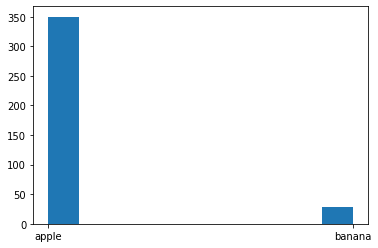

In [6]:
plt.hist(X["CHAS"])

TIPS 2
・問：欠損値の割合を見て昇順に並べ替える．

In [7]:
tmp = X.isnull().sum() / len(X)
tmp = tmp.rename('Missing Values Rate')
tmp.sort_values(ascending = False)

LSTAT      0.0
B          0.0
PTRATIO    0.0
TAX        0.0
RAD        0.0
DIS        0.0
AGE        0.0
RM         0.0
NOX        0.0
CHAS       0.0
INDUS      0.0
ZN         0.0
CRIM       0.0
Name: Missing Values Rate, dtype: float64

問：object変数でユニークな値が何個あるか調査

In [8]:
# axis = 0が列方向になる
# apply関数がある関数を実行する為のpandas関数
# select_dtypes()でデータ型を取得する事が出来る．
X.select_dtypes("int64").apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

問：<br>
・カテゴリクラスが1 or 2のものはLableEncoding <br>
・カテゴリクラスが3以上のものはOne hot Vectorに変換せよ

In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in X.select_dtypes("object"):
    if len(X[col].unique()) <= 2:
        le.fit(X[col])
        X[col] = le.transform(X[col])
        
        le.fit(X_test[col])
        X_test[col] = le.transform(X_test[col])
        
        le_count = le_count + 1

print("{} columns are label encoded".format(le_count))

1 columns are label encoded


In [10]:
# one hot vector
# （objectのカテゴリ変数の数 * 各unique数）だけ，カラムが増える．
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

問：Training Dataに存在し，Test Dataに含まれるデータをAlignせよ

In [11]:
# inner : 共通部分を残す．(outerだと全ての要素を残すことになる) 
X, X_test = X.align(X_test, join = 'inner', axis = 1)

問：X["CHAS"]の統計値を取得せよ

In [12]:
X["CHAS"].describe()

count    379.000000
mean       0.076517
std        0.266175
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

問：
ターゲットと["CHAS"]の間の相関係数を求めよ<br>
ターゲットに対する全特徴変数の相関係数を求めよ．<br>
また，その上位5つの特徴量同士の相関係数を導出して，correlation mapを描け

In [95]:
train["MEDV"].corr(train["CHAS"])

0.03644539781255701

In [88]:
train = pd.concat([X, Y], axis = 1)
test = pd.concat([X_test, Y_test], axis = 1)

In [14]:
abs(train.corr()["MEDV"]).sort_values(ascending = False)

MEDV             1.000000
LSTAT            0.741381
RM               0.670661
PTRATIO          0.484464
INDUS            0.453046
TAX              0.448134
NOX              0.429183
CRIM             0.401034
AGE              0.375591
RAD_koreha-24    0.367492
ZN               0.349783
B                0.317181
DIS              0.230411
CHAS             0.196256
RAD_koreha-8     0.187010
RAD_koreha-5     0.179926
RAD_koreha-3     0.175696
RAD_koreha-4     0.089906
RAD_koreha-2     0.088631
RAD_koreha-7     0.085660
RAD_koreha-6     0.040969
RAD_koreha-1     0.034968
Name: MEDV, dtype: float64

In [15]:
import seaborn as sns

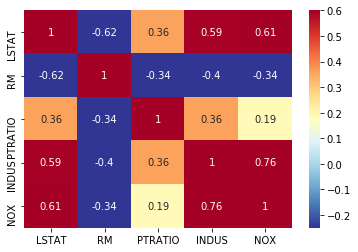

In [17]:
top5_feature = X[["LSTAT", "RM", "PTRATIO", "INDUS", "NOX"]]
sns.heatmap(top5_feature.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

問：データをbinしよう

In [18]:
X.apply(pd.Series.nunique, axis = 0)

CRIM             378
ZN                25
INDUS             71
CHAS               2
NOX               79
RM               342
AGE              277
DIS              322
TAX               61
PTRATIO           45
B                273
LSTAT            353
RAD_koreha-1       2
RAD_koreha-2       2
RAD_koreha-24      2
RAD_koreha-3       2
RAD_koreha-4       2
RAD_koreha-5       2
RAD_koreha-6       2
RAD_koreha-7       2
RAD_koreha-8       2
dtype: int64

In [19]:
# [[ ]]でpandasのDataFrame型，[]ならpandasのDataSeries型が使える
X_CRIM = X[["CRIM"]]
X_CRIM["CRIM_bins"] = pd.cut(X_CRIM["CRIM"], bins = 10)
X_CRIM.head()

,CRIM,CRIM_bins
140,0.29090,"(-0.0616, 6.798]"
206,0.22969,"(-0.0616, 6.798]"
256,0.01538,"(-0.0616, 6.798]"
170,1.20742,"(-0.0616, 6.798]"
71,0.15876,"(-0.0616, 6.798]"


問：指定したカラムでグループ分けして統計値を取得せよ

In [20]:
X_CRIM.groupby("CRIM_bins").describe()

CRIM                                                      \
                  count       mean       std       min        25%       50%   
CRIM_bins                                                                     
(-0.0616, 6.798]  313.0   0.782034  1.419449   0.00632   0.064660   0.16760   
(6.798, 13.589]    39.0   9.594272  1.856453   6.80117   8.128185   9.39063   
(13.589, 20.381]   15.0  16.157667  2.123976  13.67810  14.386000  15.57570   
(20.381, 27.172]    7.0  23.649514  1.886260  20.71620  22.324100  24.39380   
(27.172, 33.964]    1.0  28.655800       NaN  28.65580  28.655800  28.65580   
(33.964, 40.755]    0.0        NaN       NaN       NaN        NaN       NaN   
(40.755, 47.546]    2.0  43.637650  2.981799  41.52920  42.583425  43.63765   
(47.546, 54.338]    1.0  51.135800       NaN  51.13580  51.135800  51.13580   
(54.338, 61.129]    0.0        NaN       NaN       NaN        NaN       NaN   
(61.129, 67.921]    1.0  67.920800       NaN  67.92080  67.920800  67.92080   

                                       
                        75%       max  
CRIM_bins                              
(-0.0616, 6.798]   0.627390   6.71772  
(6.798, 13.589]   10.753000  13.52220  
(13.589, 20.381]  17.975650  20.08490  
(20.381, 27.172]  24.923900  25.94060  
(27.172, 33.964]  28.655800  28.65580  
(33.964, 40.755]        NaN       NaN  
(40.755, 47.546]  44.691875  45.74610  
(47.546, 54.338]  51.135800  51.13580  
(54.338, 61.129]        NaN       NaN  
(61.129, 67.921]  67.920800  67.92080

問：指定したカラムを取り除こう

In [21]:
X_dropped = X.drop("CRIM", axis = 1)
X_dropped.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_koreha-1,RAD_koreha-2,RAD_koreha-24,RAD_koreha-3,RAD_koreha-4,RAD_koreha-5,RAD_koreha-6,RAD_koreha-7,RAD_koreha-8
140,0.0,21.89,0,0.624,6.174,93.6,1.6119,437.0,21.2,388.08,24.16,0,0,0,0,1,0,0,0,0
206,0.0,10.59,0,0.489,6.326,52.5,4.3549,277.0,18.6,394.87,10.97,0,0,0,0,1,0,0,0,0
256,90.0,3.75,0,0.394,7.454,34.2,6.3361,244.0,15.9,386.34,3.11,0,0,0,1,0,0,0,0,0
170,0.0,19.58,0,0.605,5.875,94.6,2.4259,403.0,14.7,292.29,14.43,0,0,0,0,0,1,0,0,0
71,0.0,10.81,0,0.413,5.961,17.5,5.2873,305.0,19.2,376.94,9.88,0,0,0,0,1,0,0,0,0


問：idをベースにdataframeをmergeしよう
- sub:indexを取得してくる
- sub:howでinner / outer / right / leftを指定して様子を観察する (onで指定したkeyに存在するデータが存在するかを確かめるもの)

In [24]:
X_sub = X[["CRIM"]]
X_sub["num"] = np.arange(0, len(X_sub), 1)

In [28]:
X = X_sub.merge(X, on = "CRIM")

In [36]:
num = np.arange(0,len(X),2)
X_sub2 = X[["CRIM"]]
X_sub2["num"] = np.arange(0, 2 * len(X), 2)

In [70]:
df_ab = pd.DataFrame({'a': ['a_1', 'a_2', 'a_3'], 'b': ['b_1', 'b_2', 'b_3']})
df_ac = pd.DataFrame({'a': ['a_1', 'a_2', 'a_4'], 'c': ['c_1', 'c_2', 'c_4']})

In [72]:
df_ab

,a,b
0,a_1,b_1
1,a_2,b_2
2,a_3,b_3


In [73]:
df_ac

,a,c
0,a_1,c_1
1,a_2,c_2
2,a_4,c_4


In [79]:
print(pd.merge(df_ab, df_ac, on='a', how='outer'))
test = pd.merge(df_ab, df_ac, on='a', how='outer')

     a    b    c
0  a_1  b_1  c_1
1  a_2  b_2  c_2
2  a_3  b_3  NaN
3  a_4  NaN  c_4


欠損値を0で埋める若しくは欠落させる
- testに対して行う

In [80]:
test.isnull().sum()

a    0
b    1
c    1
dtype: int64

In [86]:
# 欠損値をある値で埋める
test.fillna(1)

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2
2,a_3,b_3,1
3,a_4,1,c_4


In [85]:
# 欠損値抜く
test.dropna()

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2


df.loc()・df.iloc()：基本で使う関数<br>

df.at()・df.iat()：単独の値を変更するのに用いる．loc()やiloc()よりも高速だが１つの値しか書き換えれない．<br>

df.ix()：インデックス・ラベルどちらでも指定可能．df.ix()は使わずにlocかiloc使った方が無難

groupy()の使い方
（as_indexを含めて）

In [14]:
# 適当なデータ作成
df = pd.DataFrame({
    'city': ['osaka', 'osaka', 'osaka', 'osaka', 'tokyo', 'tokyo', 'tokyo'],
    'food': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})

In [20]:
print(df.groupby('city').mean().head())

print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
print(df.groupby(['city', 'food']).mean())

print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
# デフォルドでは指定したカラムがインデックスになるが，避けたい時にas_index = Falseを使う
print(df.groupby(['city', 'food'], as_index=False).mean())

       price  quantity
city                  
osaka  212.5       2.5
tokyo  250.0       6.0
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
              price  quantity
city  food                   
osaka apple   100.0       1.0
      banana  275.0       3.5
      orange  200.0       2.0
tokyo apple   175.0       5.5
      banana  400.0       7.0
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    city    food  price  quantity
0  osaka   apple  100.0       1.0
1  osaka  banana  275.0       3.5
2  osaka  orange  200.0       2.0
3  tokyo   apple  175.0       5.5
4  tokyo  banana  400.0       7.0


In [24]:
# どのようなgroupが出来たか確認する．
print(df.groupby('city').groups)

# あるgroupにどんな値が入ったかを確認する．
print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
print(df.groupby('city').get_group("osaka"))

# 各グループのサイズを取得
print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
print(df.groupby("city").size())

{'osaka': Int64Index([0, 1, 2, 3], dtype='int64'), 'tokyo': Int64Index([4, 5, 6], dtype='int64')}
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    city    food  price  quantity
0  osaka   apple    100         1
1  osaka  orange    200         2
2  osaka  banana    250         3
3  osaka  banana    300         4
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
city
osaka    4
tokyo    3
dtype: int64


Aggregation : agg()関数を使う
- GroupBy.mean() のように、グループごとに値を求めて表を作るような操作を Aggregation と呼ぶ
- .agg(['count', 'mean', 'max', 'min', 'sum'])とすれば，いちいちgroupby().mean()を何回も繰り返さなくても統計値が取得できる．
- .columns.levels[0]と併せて

In [29]:
print(df.groupby("city").agg(np.mean))
print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

def my_mean(s):
    """わざとらしいサンプル"""
    return np.mean(s)

# 複数指定する事も可能．
# 関数を.agg()関数の引数に取ることも可能
print(df.groupby('city').agg({'price': my_mean, 'quantity': np.sum}))

       price  quantity
city                  
osaka  212.5       2.5
tokyo  250.0       6.0
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
       price  quantity
city                  
osaka  212.5        10
tokyo  250.0        18


★：https://qiita.com/propella/items/a9a32b878c77222630ae
でさらに詳しい使い方を記載

.reset_index()の使い方


bureau_agg.columns = columnsでカラムの名前を買える